In [1]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
##original_data####

In [207]:
import pandas as pd

In [226]:
df = pd.read_csv(r"C:/Users/RAHUL/Downloads/WA_Fn-UseC_-Marketing-Campaign-Plan_-GroceryS (4).csv")

In [227]:
df.head()

,storeid,HealthyStore,StoreSize,StoreLayout,customerID,gender,WhoShoppingFor,Vegetarian,ShoppingStyle,CouponUser,week,CouponSequence,CarryOver,CouponValue,AmountSpent
0,1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,1,"2,4,1,3",0,05 percent,135.24
1,1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,2,"2,4,1,3",2,25 percent,128.65
2,1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,3,"2,4,1,3",4,00 No value,112.86
3,1,Regular store,Medium,No emphasis,6193-QDKCN,Male,Self and spouse,No,Often; what's on sale,From newspaper,4,"2,4,1,3",1,15 percent,130.14
4,1,Regular store,Medium,No emphasis,9245-DEZSB,Male,Self and family,No,Weekly; similar items,From mailings,1,"4,3,2,1",0,25 percent,155.61


In [228]:
data =pd.get_dummies(data=df, columns=['StoreLayout','StoreSize','customerID','ShoppingStyle','WhoShoppingFor','CouponValue','CouponSequence'])

In [229]:
data

,storeid,HealthyStore,gender,Vegetarian,CouponUser,week,CarryOver,AmountSpent,StoreLayout_Emphasizes bakery,StoreLayout_Emphasizes deli,...,WhoShoppingFor_Self and family,WhoShoppingFor_Self and spouse,CouponValue_00 No value,CouponValue_05 percent,CouponValue_15 percent,CouponValue_25 percent,"CouponSequence_1,2,3,4","CouponSequence_2,4,1,3","CouponSequence_3,1,4,2","CouponSequence_4,3,2,1"
0,1,Regular store,Male,No,From newspaper,1,0,135.24,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,Regular store,Male,No,From newspaper,2,2,128.65,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1,Regular store,Male,No,From newspaper,3,4,112.86,0,0,...,0,1,1,0,0,0,0,1,0,0
3,1,Regular store,Male,No,From newspaper,4,1,130.14,0,0,...,0,1,0,0,1,0,0,1,0,0
4,1,Regular store,Male,No,From mailings,1,0,155.61,0,0,...,1,0,0,0,0,1,0,0,0,1
5,1,Regular store,Male,No,From mailings,2,4,140.74,0,0,...,1,0,0,0,1,0,0,0,0,1
6,1,Regular store,Male,No,From mailings,3,3,123.53,0,0,...,1,0,0,1,0,0,0,0,0,1
7,1,Regular store,Male,No,From mailings,4,2,130.53,0,0,...,1,0,1,0,0,0,0,0,0,1
8,1,Regular store,Male,No,From newspaper,1,0,190.83,0,0,...,1,0,1,0,0,0,1,0,0,0
9,1,Regular store,Male,No,From newspaper,2,1,0.00,0,0,...,1,0,0,1,0,0,1,0,0,0


In [230]:
CouponUser = {'From newspaper': 0,'From mailings': 1 , 'No' : 2, 'From both': 3} 

In [231]:
data.CouponUser = [CouponUser[item] for item in data.CouponUser] 
print(data) 

      storeid   HealthyStore  gender Vegetarian  CouponUser  week  CarryOver  \
0           1  Regular store    Male         No           0     1          0   
1           1  Regular store    Male         No           0     2          2   
2           1  Regular store    Male         No           0     3          4   
3           1  Regular store    Male         No           0     4          1   
4           1  Regular store    Male         No           1     1          0   
5           1  Regular store    Male         No           1     2          4   
6           1  Regular store    Male         No           1     3          3   
7           1  Regular store    Male         No           1     4          2   
8           1  Regular store    Male         No           0     1          0   
9           1  Regular store    Male         No           0     2          1   
10          1  Regular store    Male         No           0     3          2   
11          1  Regular store    Male    

In [232]:
gender ={'Male': 1,'Female': 0}
Vegetarian ={'Yes': 1,'No': 0}
HealthyStore = {'Regular store': 0,'Marketed as health food store': 1}
#StoreLayout = {'No emphasis':0,'Emphasizes deli':1,'Emphasizes bakery': 2,'Emphasizes produce': 3}
#StoreSize = {'Small': 0,'Medium':1,'Large':1}

In [215]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
StoreSize = [{'Small': 1, 'Medium':2, 'Large':3}]
#f = h.transform(StoreSize)
#f.toarray()

In [233]:
data.gender = [gender[item] for item in data.gender] 
data.Vegetarian = [Vegetarian[item] for item in data.Vegetarian] 
data.HealthyStore = [HealthyStore[item] for item in data.HealthyStore] 

In [234]:
data = data.dropna()

In [235]:
cols=list(data.columns)

In [236]:
cols.remove('CouponUser')

In [237]:
X = data[cols]

In [238]:
y = data.CouponUser

In [239]:
print(len(y),len(X))

1496 1496


In [255]:
y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

#splitting training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=0)


In [256]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =200,random_state=0)
y_score = clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
rf_prediction =clf.predict(X_test)

In [257]:
accuracy

0.7566666666666667

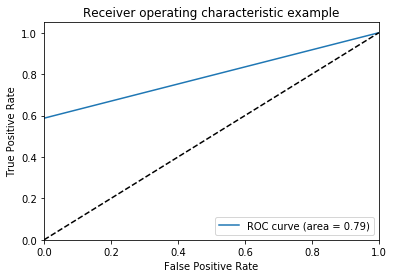

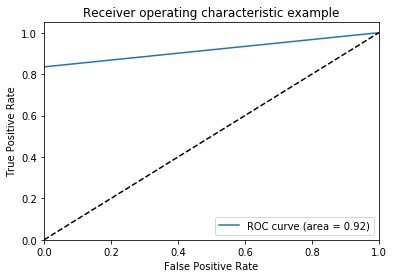

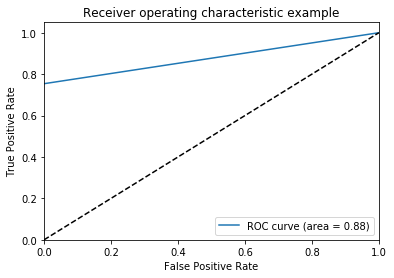

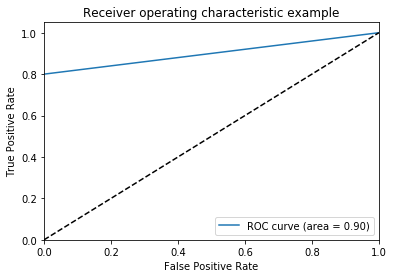

In [258]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], rf_prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()